In [22]:
import boto3
import csv

def get_keys():
    # lê o arquivo csv com as chaves
    key = csv.reader(open('aws_keys.csv', 'r'), delimiter=';')
    for row in key:
        access_key_id = row[0]
        secret_access_key = row[1]

    return access_key_id, secret_access_key

access_key_id, secret_access_key = get_keys()

def detect_text(photo, bucket):
    client = boto3.client('rekognition',
                            aws_access_key_id=access_key_id,
                            aws_secret_access_key=secret_access_key,
                            region_name='us-east-1')

    response = client.detect_text(Image={'S3Object': {'Bucket': bucket, 'Name': photo}})

    textDetections = response['TextDetections']
    
    print('Detected text\n----------')
    for text in textDetections:
        print('Detected text:' + text['DetectedText'])
        print('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('Id: {}'.format(text['Id']))
        if 'ParentId' in text:
            print('Parent Id: {}'.format(text['ParentId']))
        print('Type:' + text['Type'])
        print()
    return len(textDetections)

def main():
    bucket = 'ibre-apresentacao-ia'
    photo = 'nf.jpg'
    text_count = detect_text(photo, bucket)
    print("Text detected: " + str(text_count))

if __name__ == "__main__":
    main()

Detected text
----------
Detected text:QTDIUNIVL UN R$ 1 VV TR R$)*/VL ITEM R$
Confidence: 75.44%
Id: 0
Type:LINE

Detected text:001 7283 0,232 KG X 29,98 (2,18)
Confidence: 96.43%
Id: 1
Type:LINE

Detected text:6,96
Confidence: 93.97%
Id: 2
Type:LINE

Detected text:LING SADIA CALABRESA K
Confidence: 95.64%
Id: 3
Type:LINE

Detected text:002 7896036099551 1 UN X 3,98 (1,44)
Confidence: 95.39%
Id: 4
Type:LINE

Detected text:3,98
Confidence: 97.94%
Id: 5
Type:LINE

Detected text:KETCHUP ELEFANTE 390G.
Confidence: 90.77%
Id: 6
Type:LINE

Detected text:003 7892840802714 1 UN X 7,69 (2,51)
Confidence: 92.89%
Id: 7
Type:LINE

Detected text:7,69
Confidence: 99.08%
Id: 8
Type:LINE

Detected text:REFR.PEPSI 2LT.LIMAO
Confidence: 78.69%
Id: 9
Type:LINE

Detected text:004 7898123201533 yourself UN N X 7 98 (1,63)
Confidence: 70.73%
Id: 10
Type:LINE

Detected text:7,98
Confidence: 67.02%
Id: 11
Type:LINE

Detected text:MASSA F/PIZZA 270G.FR.
Confidence: 95.06%
Id: 12
Type:LINE

Detected text:3,29


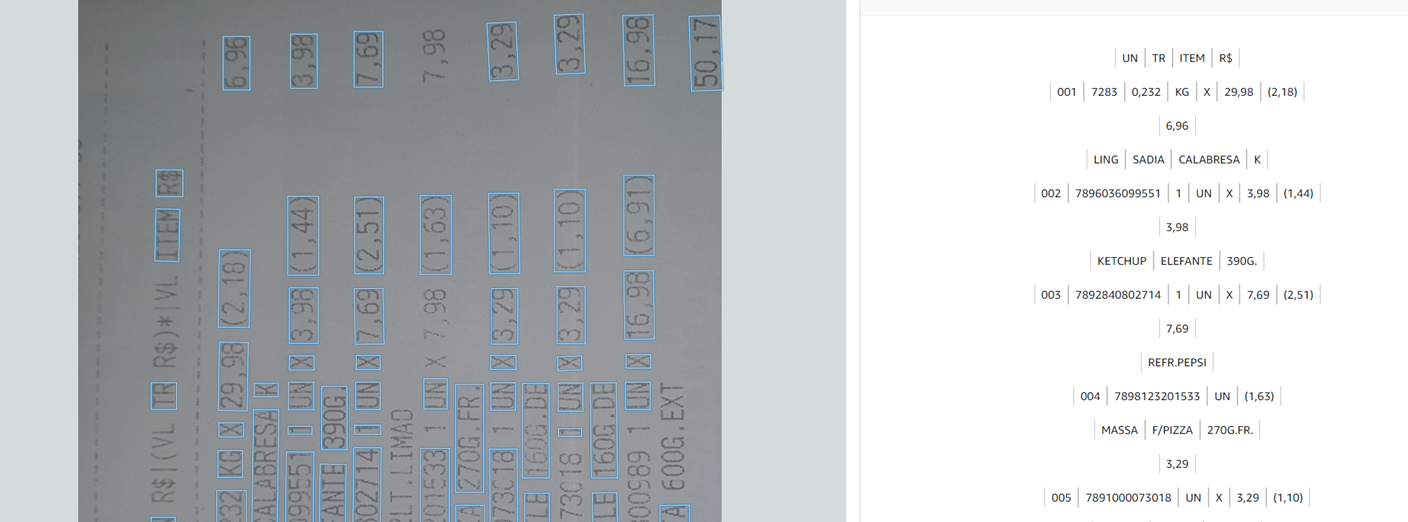